In [8]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles,make_moons
from sklearn.cluster import AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.preprocessing import StandardScaler

In [9]:
data = np.load("test_data.npy", allow_pickle=True).item()
#Data is a dictionary with keys "data" and "labels"
X, labels = data["data"], data["labels"]

In [57]:
# Helper function to plot
def plot_clusters(data,true_labels=None, cluster_labels=None,title_true="True Clusters",title_cluster="Agglomerative Clustering"):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
    ax1.scatter(data[:,0],data[:,1],c=true_labels)
    ax1.set_title(title_true)
    if cluster_labels is not None:
        ax2.scatter(data[:,0],data[:,1],c=cluster_labels)
        ax2.set_title(title_cluster)
    plt.show()    

0.0.1 common

In [11]:
seed=0

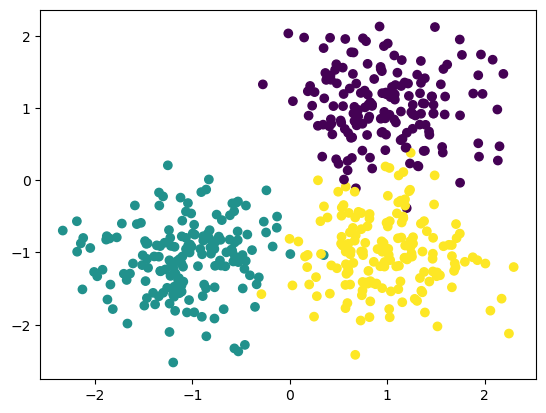

In [12]:
# blob data
centers=[[1,1],[-1,-1],[1,-1]]
blob_X,blob_true_labels=make_blobs(n_samples=500, centers=centers, cluster_std=0.5,random_state=seed)
scaled_blob_X=StandardScaler().fit_transform(blob_X)
plt.scatter(blob_X[:,0],blob_X[:,1],c=blob_true_labels)

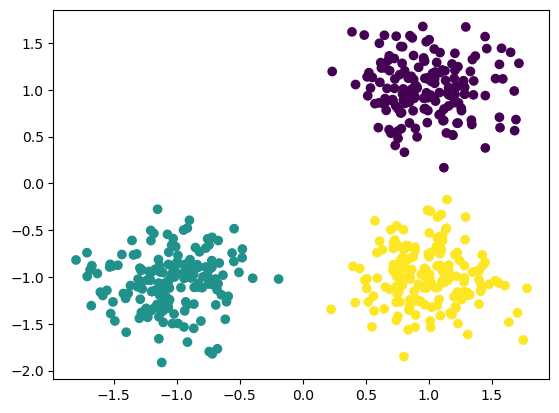

In [25]:
# blob data
centers=[[1,1],[-1,-1],[1,-1]]
blob_X2,blob_true_labels2=make_blobs(n_samples=500, centers=centers, cluster_std=0.3,random_state=seed)
scaled_blob_X2=StandardScaler().fit_transform(blob_X2)
plt.scatter(blob_X2[:,0],blob_X2[:,1],c=blob_true_labels2)

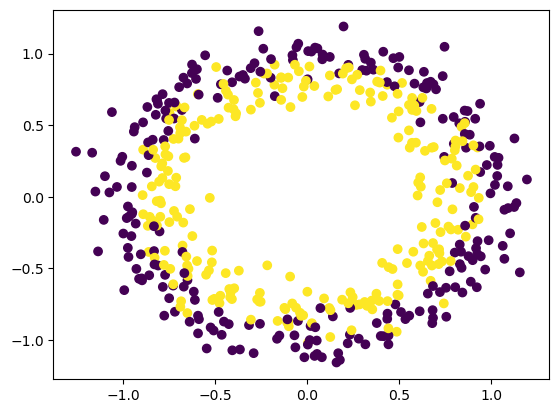

In [35]:
# concentric circles data
circle_X, circle_true_labels=make_circles(n_samples=500,noise=0.1,random_state=seed)
scaled_circle_X=StandardScaler().fit_transform(circle_X)
plt.scatter(circle_X[:,0],circle_X[:,1], c=circle_true_labels)

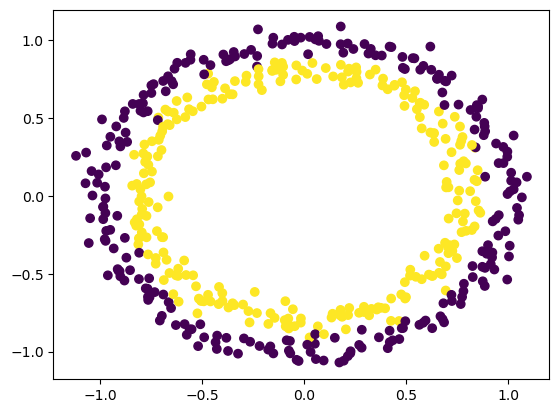

In [34]:
# concentric circles data
circle_X, circle_true_labels=make_circles(n_samples=500,noise=0.05,random_state=seed)
scaled_circle_X=StandardScaler().fit_transform(circle_X)
plt.scatter(circle_X[:,0],circle_X[:,1], c=circle_true_labels)

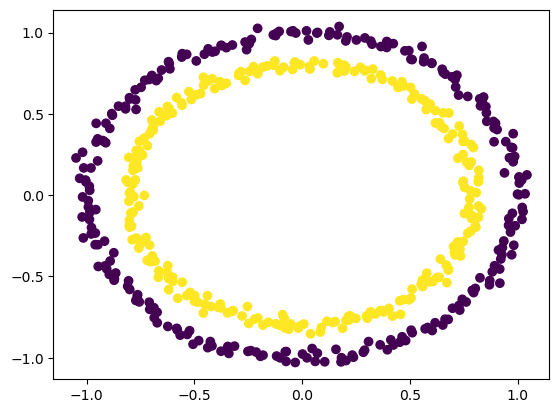

In [36]:
# concentric circles data
circle_X, circle_true_labels=make_circles(n_samples=500,noise=0.025,random_state=seed)
scaled_circle_X=StandardScaler().fit_transform(circle_X)
plt.scatter(circle_X[:,0],circle_X[:,1], c=circle_true_labels)

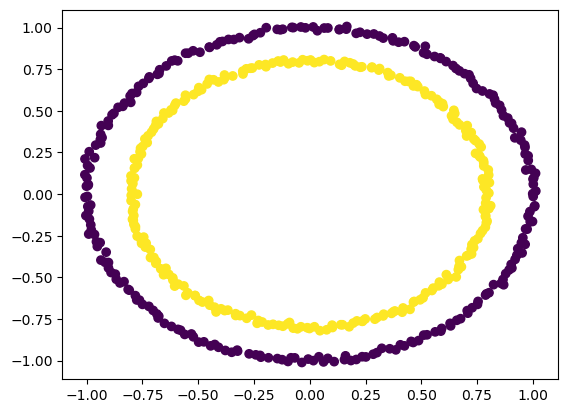

In [42]:
# concentric circles data
circle_X, circle_true_labels=make_circles(n_samples=500,noise=0.01,random_state=seed)
scaled_circle_X=StandardScaler().fit_transform(circle_X)
plt.scatter(circle_X[:,0],circle_X[:,1], c=circle_true_labels)

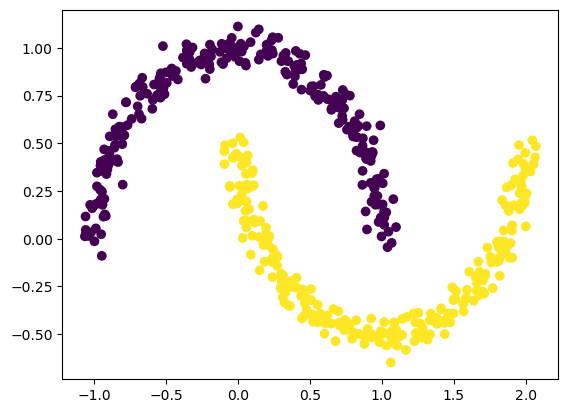

In [47]:
#moons data
moons_X,moons_true_labels=make_moons(n_samples=500,noise=0.05,random_state=seed)
scaled_moons_X=StandardScaler().fit_transform(moons_X)
plt.scatter(moons_X[:,0],moons_X[:,1], c=moons_true_labels)

#### 0.0.2 Hierarchial Clustering

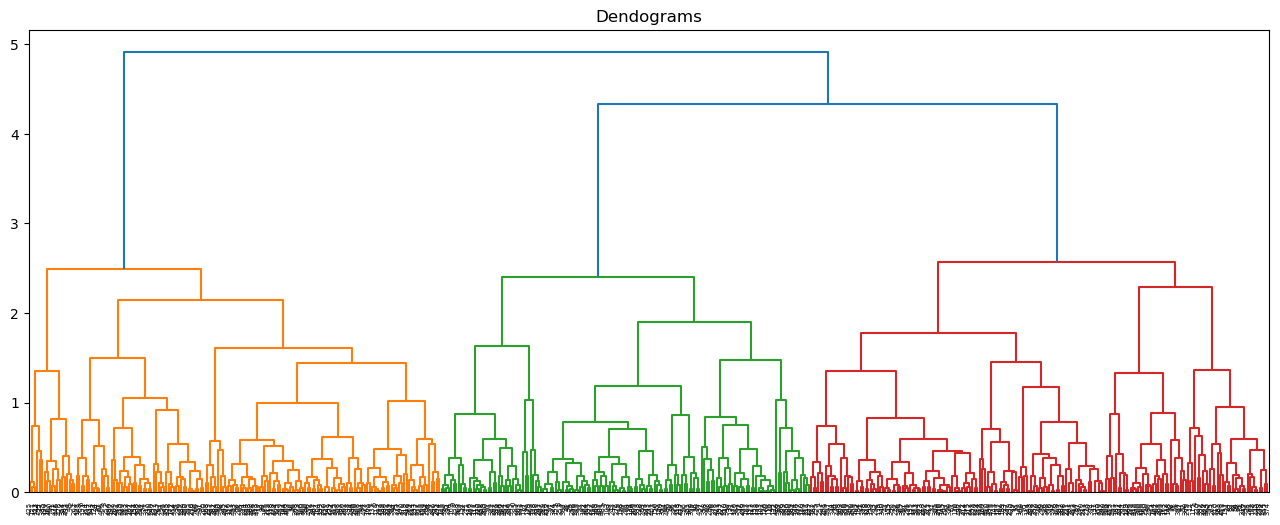

In [48]:
plt.figure(figsize=(16,6))
plt.title("Dendograms")
Z=shc.linkage(scaled_blob_X,method="complete")
dend=shc.dendrogram(Z)

In [51]:
agglo_cluster=AgglomerativeClustering(n_clusters=3,metric="euclidean",linkage="complete")
agglo_cluster.fit(scaled_blob_X)

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=3)

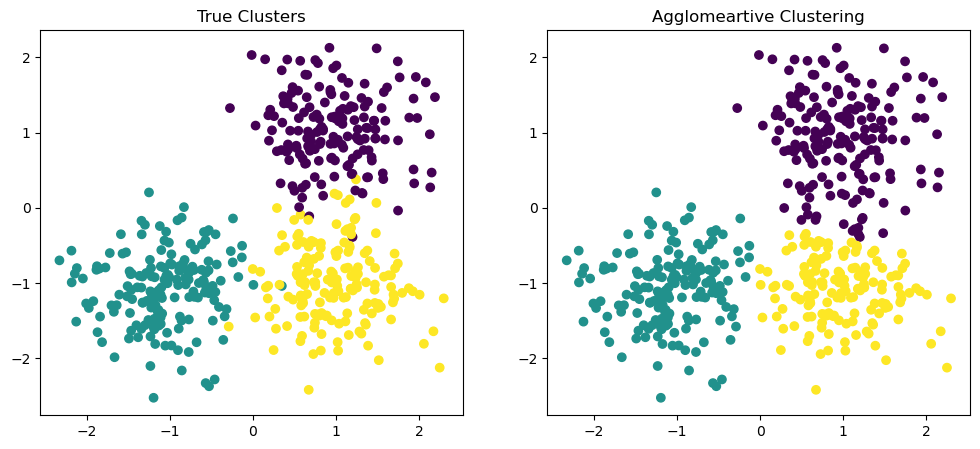

In [58]:
plot_clusters(blob_X,blob_true_labels,agglo_cluster.labels_,title_cluster="Agglomeartive Clustering")

In [61]:
X, pred_labels, true_labels = scaled_blob_X, agglo_cluster.labels_, blob_true_labels
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, pred_labels))
print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(true_labels, pred_labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(true_labels, pred_labels, average_method="arithmetic"))


Silhouette Coefficient: 0.555
Adjusted Rand index: 0.881
Adjusted Mutual Information: 0.863


### For Circular Data

In [63]:
agglo_cluster=AgglomerativeClustering(n_clusters=2,metric="euclidean", linkage="complete")
agglo_cluster.fit(scaled_circle_X)

AgglomerativeClustering(linkage='complete', metric='euclidean')

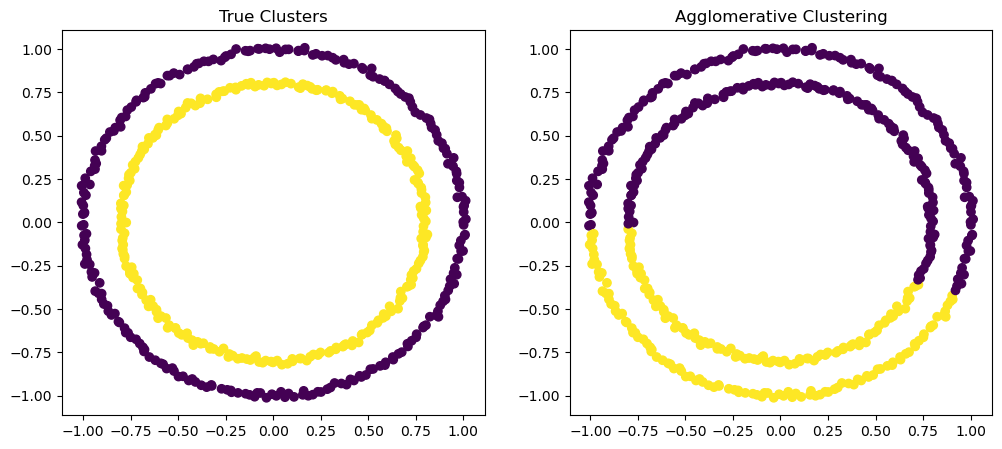

In [64]:
plot_clusters(circle_X,circle_true_labels,agglo_cluster.labels_,title_cluster="Agglomerative Clustering")

In [80]:
agglo_cluster3=AgglomerativeClustering(n_clusters=2,metric="euclidean", linkage="complete")
agglo_cluster3.fit(scaled_circle_X)

AgglomerativeClustering(linkage='complete', metric='euclidean')

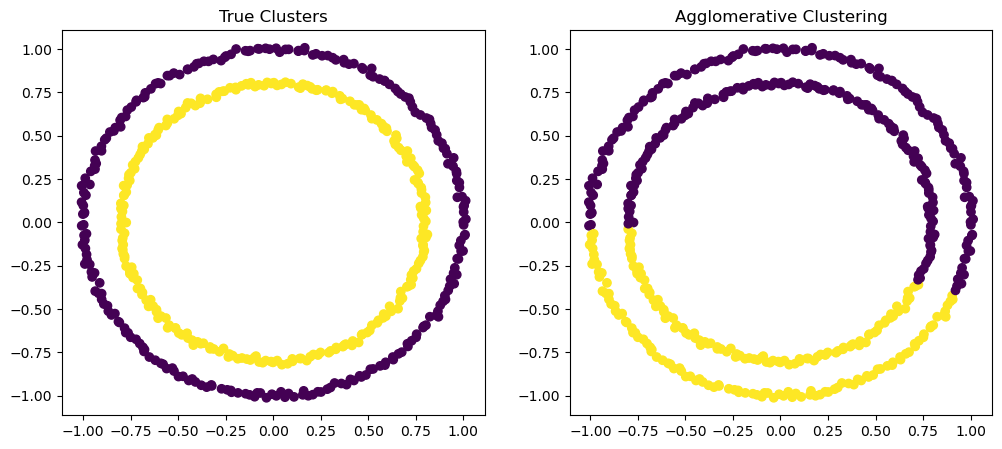

In [81]:
plot_clusters(circle_X,circle_true_labels,agglo_cluster3.labels_,title_cluster="Agglomerative Clustering")

In [70]:
X,pred_labels,true_labels=scaled_circle_X,agglo_cluster.labels_,circle_true_labels
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, pred_labels))
print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(true_labels, pred_labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(true_labels, pred_labels, average_method="arithmetic"))

Silhouette Coefficient: 0.389
Adjusted Rand index: -0.002
Adjusted Mutual Information: -0.001


### For Moons Data

In [75]:
agglo_cluster=AgglomerativeClustering(n_clusters=2,metric="euclidean",linkage="ward")
agglo_cluster.fit(scaled_moons_X)

AgglomerativeClustering(metric='euclidean')

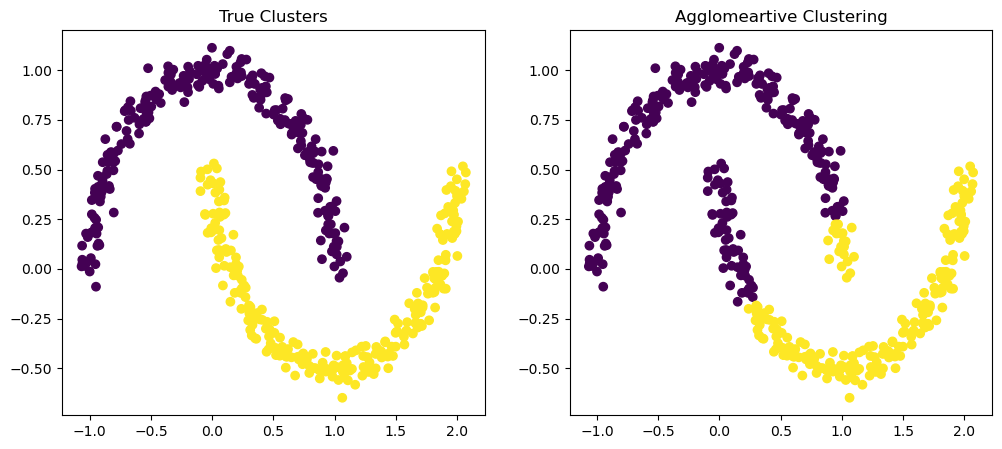

In [76]:
plot_clusters(moons_X,moons_true_labels,agglo_cluster.labels_,title_cluster="Agglomeartive Clustering")

In [84]:
X,pred_labels,true_labels=scaled_moons_X,agglo_cluster.labels_,moons_true_labels
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, pred_labels))
print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(true_labels, pred_labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(true_labels, pred_labels, average_method="arithmetic"))


Silhouette Coefficient: 0.484
Adjusted Rand index: 0.467
Adjusted Mutual Information: 0.390


### 0.0.3 DBSCAN

For blob Data

In [85]:
dbscan_cluster=DBSCAN(eps=0.3,min_samples=20)
dbscan_cluster.fit(scaled_blob_X)

DBSCAN(eps=0.3, min_samples=20)

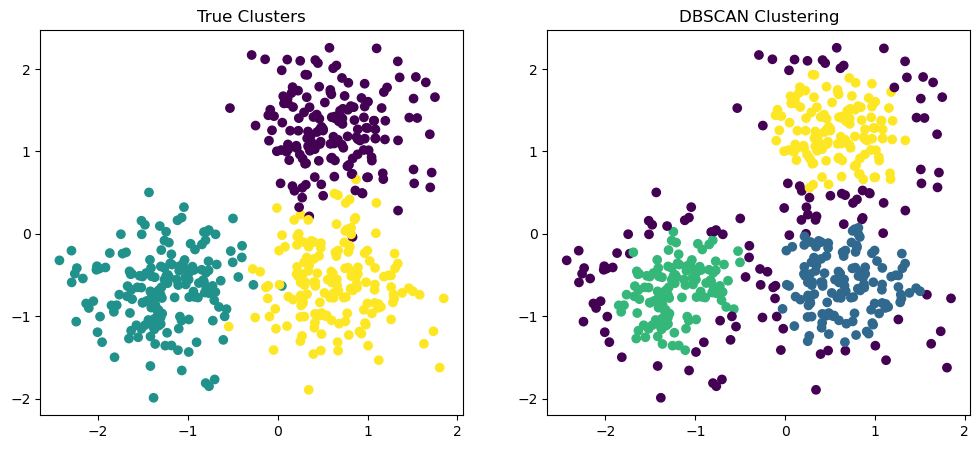

In [86]:
plot_clusters(scaled_blob_X,blob_true_labels,dbscan_cluster.labels_,title_cluster="DBSCAN Clustering")

In [104]:
dbscan_cluster=DBSCAN(eps=0.5,min_samples=40)
dbscan_cluster.fit(scaled_blob_X)

DBSCAN(min_samples=40)

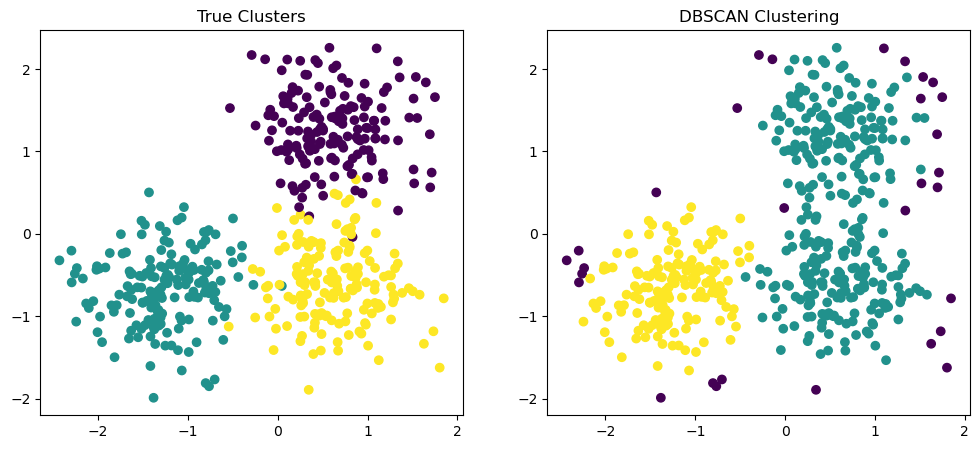

In [105]:
plot_clusters(scaled_blob_X,blob_true_labels,dbscan_cluster.labels_,title_cluster="DBSCAN Clustering")

In [110]:
dbscan_cluster=DBSCAN(eps=0.6,min_samples=60)
dbscan_cluster.fit(scaled_blob_X)

DBSCAN(eps=0.6, min_samples=60)

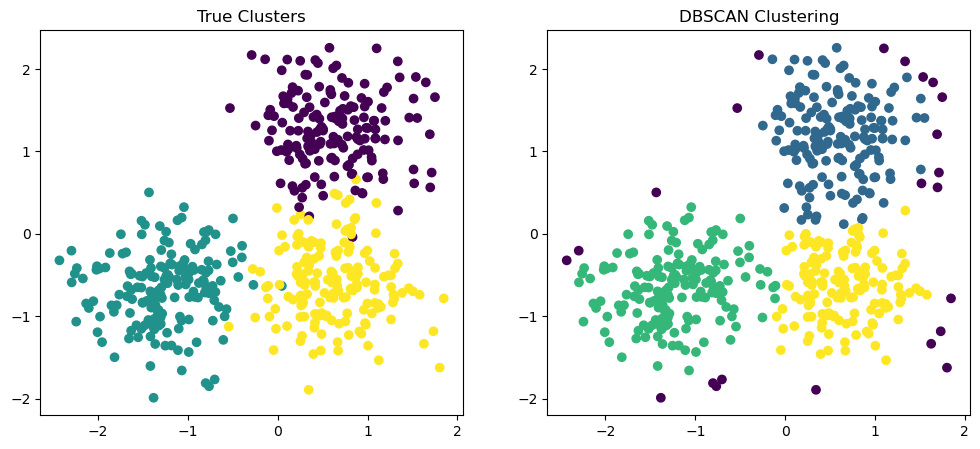

In [111]:
plot_clusters(scaled_blob_X,blob_true_labels,dbscan_cluster.labels_,title_cluster="DBSCAN Clustering")

In [112]:
X, pred_labels,true_labels=scaled_blob_X,dbscan_cluster.labels_,blob_true_labels

In [113]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, pred_labels))
print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(true_labels, pred_labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(true_labels, pred_labels, average_method="arithmetic"))


Silhouette Coefficient: 0.522
Adjusted Rand index: 0.802
Adjusted Mutual Information: 0.743


### For circular data

In [114]:
dbscan_cluster=DBSCAN(eps=0.3,min_samples=20)
dbscan_cluster.fit(scaled_circle_X)

DBSCAN(eps=0.3, min_samples=20)

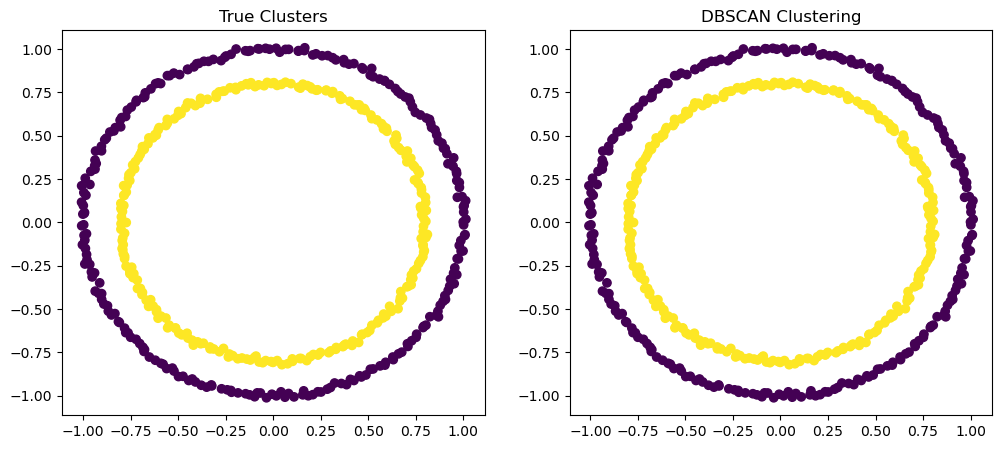

In [129]:
plot_clusters(circle_X,circle_true_labels,dbscan_cluster.labels_,title_cluster="DBSCAN Clustering")

In [126]:
dbscan_cluster=DBSCAN(eps=0.2,min_samples=10)
dbscan_cluster.fit(scaled_circle_X)

DBSCAN(eps=0.2, min_samples=10)

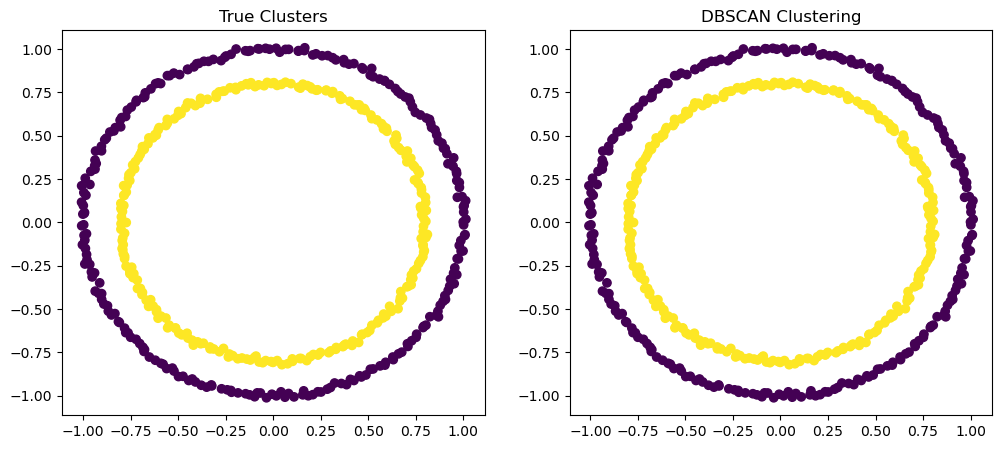

In [127]:
plot_clusters(circle_X,circle_true_labels,dbscan_cluster.labels_,title_cluster="DBSCAN Clustering")

In [128]:
X, pred_labels,true_labels=scaled_circle_X,dbscan_cluster.labels_,circle_true_labels
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, pred_labels))
print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(true_labels, pred_labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(true_labels, pred_labels, average_method="arithmetic"))


Silhouette Coefficient: 0.019
Adjusted Rand index: 1.000
Adjusted Mutual Information: 1.000


### For Moons Data

In [131]:
dbscan_cluster=DBSCAN(eps=0.2,min_samples=10)
dbscan_cluster.fit(scaled_moons_X)

DBSCAN(eps=0.2, min_samples=10)

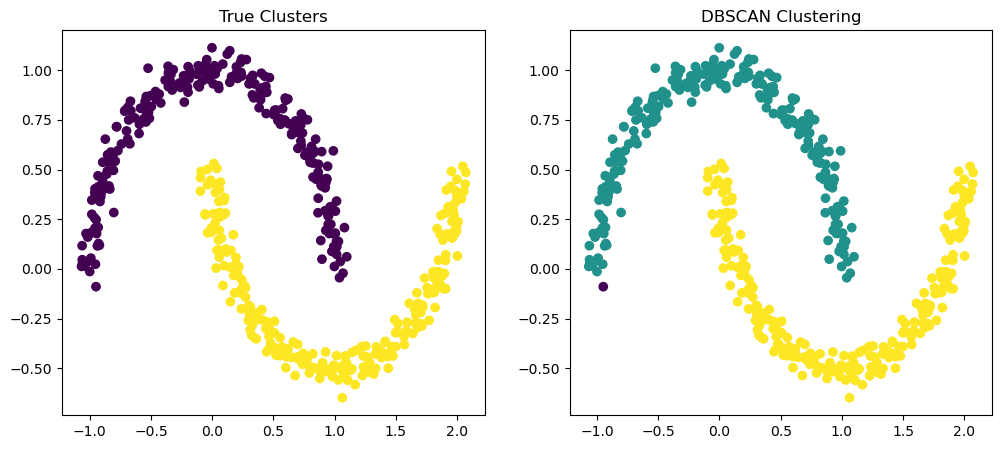

In [132]:
plot_clusters(moons_X,moons_true_labels,dbscan_cluster.labels_,title_cluster="DBSCAN Clustering")

In [133]:
X, pred_labels,true_labels=scaled_moons_X,dbscan_cluster.labels_,moons_true_labels
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, pred_labels))
print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(true_labels, pred_labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(true_labels, pred_labels, average_method="arithmetic"))


Silhouette Coefficient: 0.250
Adjusted Rand index: 0.996
Adjusted Mutual Information: 0.991


#### 0.0.4 Spectral Clustering
For Blob Data

In [141]:
spectral_cluster=SpectralClustering(n_clusters=3,affinity="nearest_neighbors")
spectral_cluster.fit(scaled_blob_X)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

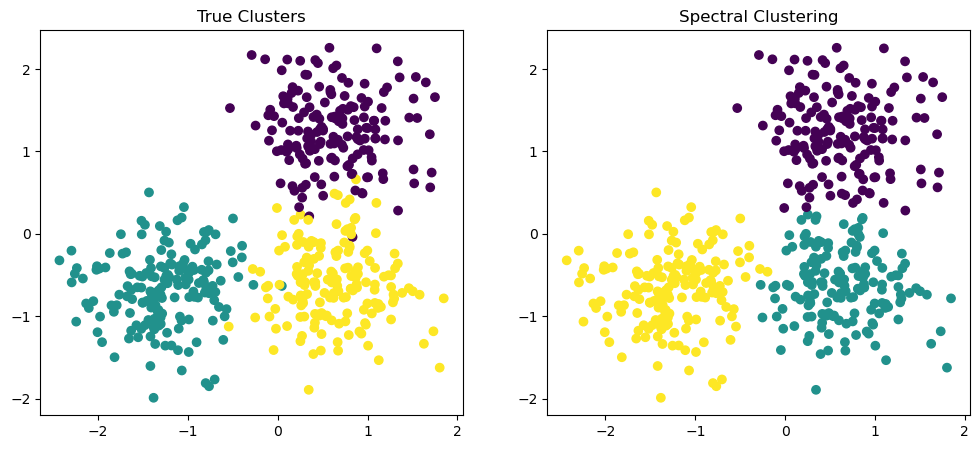

In [142]:
plot_clusters(scaled_blob_X,blob_true_labels,spectral_cluster.labels_,title_cluster="Spectral Clustering")

In [143]:
X, pred_labels,true_labels=scaled_blob_X,spectral_cluster.labels_,blob_true_labels
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, pred_labels))
print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(true_labels, pred_labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(true_labels, pred_labels, average_method="arithmetic"))


Silhouette Coefficient: 0.566
Adjusted Rand index: 0.918
Adjusted Mutual Information: 0.880


### For Circular Data

In [144]:
spectral_cluster= SpectralClustering(n_clusters=2,affinity="nearest_neighbors")
spectral_cluster.fit(scaled_circle_X)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


SpectralClustering(affinity='nearest_neighbors', n_clusters=2)

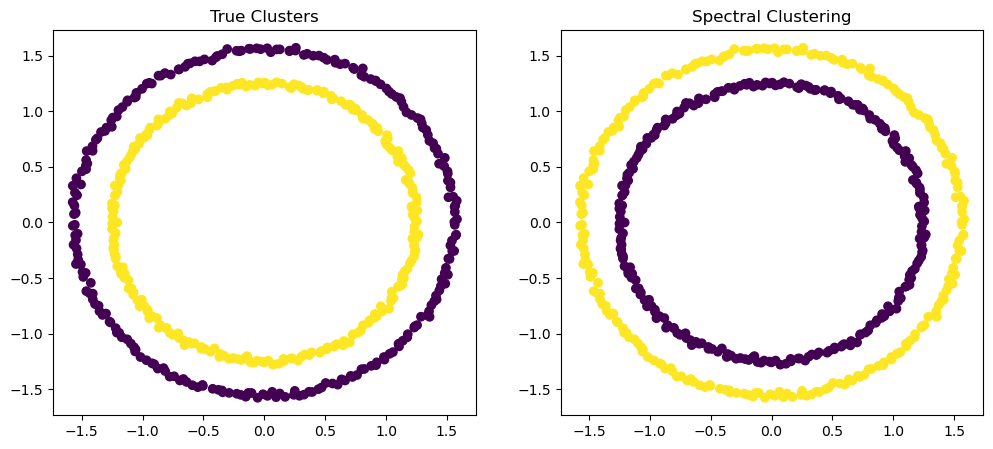

In [145]:
plot_clusters(scaled_circle_X,circle_true_labels,spectral_cluster.labels_,title_cluster="Spectral Clustering")

In [146]:
X, pred_labels,true_labels=scaled_circle_X,spectral_cluster.labels_,circle_true_labels
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, pred_labels))
print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(true_labels, pred_labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(true_labels, pred_labels, average_method="arithmetic"))


Silhouette Coefficient: 0.019
Adjusted Rand index: 1.000
Adjusted Mutual Information: 1.000


### For Moons Data

In [147]:
spectral_cluster= SpectralClustering(n_clusters=2,affinity="nearest_neighbors")
spectral_cluster.fit(scaled_moons_X)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


SpectralClustering(affinity='nearest_neighbors', n_clusters=2)

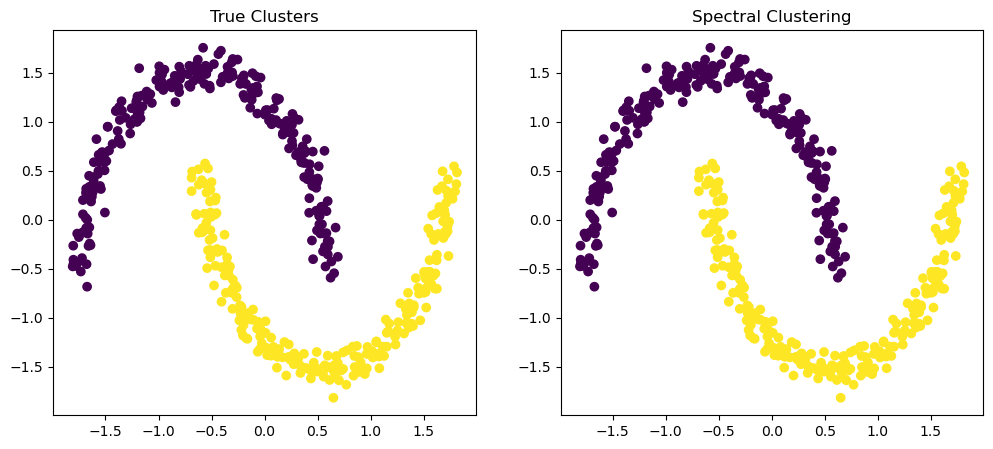

In [148]:
plot_clusters(scaled_moons_X,moons_true_labels,spectral_cluster.labels_,title_cluster="Spectral Clustering")

In [149]:
X, pred_labels,true_labels=scaled_moons_X,spectral_cluster.labels_,moons_true_labels
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, pred_labels))
print("Adjusted Rand index: %0.3f" % metrics.adjusted_rand_score(true_labels, pred_labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(true_labels, pred_labels, average_method="arithmetic"))


Silhouette Coefficient: 0.387
Adjusted Rand index: 1.000
Adjusted Mutual Information: 1.000


In [ ]:
##############################################################################################################

In [156]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from scipy.linalg import eig 
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles, make_moons, make_gaussian_quantiles
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler

In [159]:
import matplotlib.pyplot as plt

def plt_histogram(x, bins=50):
    plt.hist(x, bins=bins)

def plt_scatter(x, y, labels):
    plt.scatter(x, y, c=labels)

def compare_clusters(data, true_labels=None, cluster_labels=None, title_true="True clusters", title_cluster="Agglomerative Clustering"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.scatter(data[:, 0], data[:, 1], c=true_labels)
    ax1.set_title(title_true)
    
    if cluster_labels is not None:
        ax2.scatter(data[:, 0], data[:, 1], c=cluster_labels)
        ax2.set_title(title_cluster)
    
    plt.show()


In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

def get_scores(true_labels, pred_labels):
    rand_index = metrics.adjusted_rand_score(true_labels, pred_labels)
    mutual_info = metrics.adjusted_mutual_info_score(true_labels, pred_labels, average_method='arithmetic')
    return rand_index, mutual_info

def get_normalized_laplacian(W):
    D = np.diag(np.sum(W, axis=1))
    I = np.eye(D.shape[0])
    Lraw = I - np.linalg.inv(D) @ W
    return Lraw

def get_k_lower_eigen(L, k=10):
    evalues, evectors = np.linalg.eig(L)
    index = evalues.argsort()
    lower_evalues, lower_evectors = evalues[index[:k]], evectors[:, index[:k]]
    return np.real(lower_evalues), np.real(lower_evectors)

def plot_eigen_values(values):
    x = np.arange(len(values))
    plt.title("Eigenvalues")
    plt.plot(x, values, "*")

def plot_eigen_vectors(vectors, num_elems=10, k=5, figsize=(20, 5)):
    fig, ax = plt.subplots(1, k, figsize=figsize)
    for i in range(k):
        ax[i].plot(np.arange(num_elems), vectors[:num_elems, i], "b-")
        ax[i].set_title(f"Eigenvector {i + 1}")

0.0.2 Gaussian data

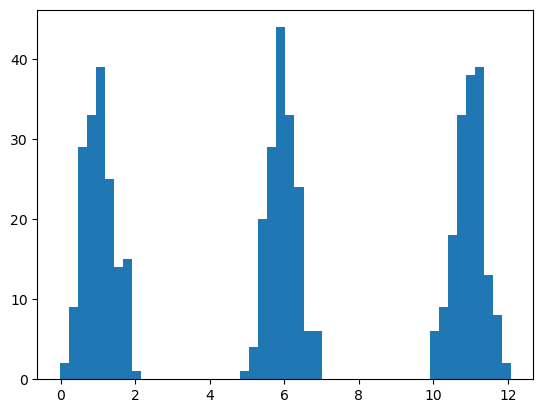

In [162]:
centers=[[1.],[6],[11.]]
gaus_data,gaus_true_labels=make_blobs(n_samples=500,n_features=1,centers=centers,cluster_std=0.4,random_state=seed)
plt_histogram(gaus_data)

In [164]:
gaus_spec_cluster=SpectralClustering(n_clusters=4,affinity='nearest_neighbors',n_neighbors=10,assign_labels="kmeans")
gaus_spec_cluster.fit(gaus_data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


SpectralClustering(affinity='nearest_neighbors', n_clusters=4)

In [165]:
rand_index,mutual_info=get_scores(gaus_true_labels,gaus_spec_cluster.labels_)
print(f"rand_index: {rand_index:.3f} mutual_info:{mutual_info:3f}")

rand_index: 0.482 mutual_info:0.656542


In [166]:
W=gaus_spec_cluster.affinity_matrix_.A

In [167]:
Lraw=get_normalized_laplacian(W)
evalues, evectors=get_k_lower_eigen(Lraw,k=10)

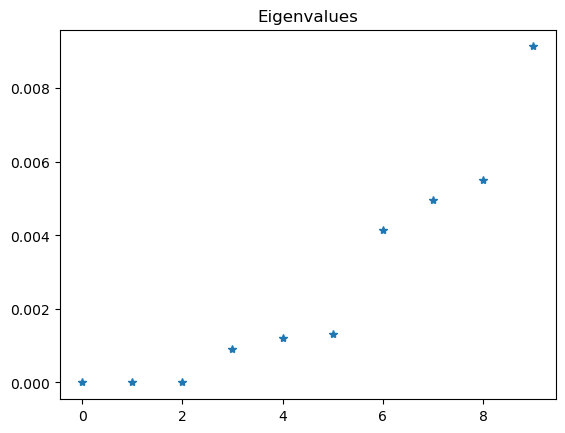

In [168]:
plot_eigen_values(evalues)

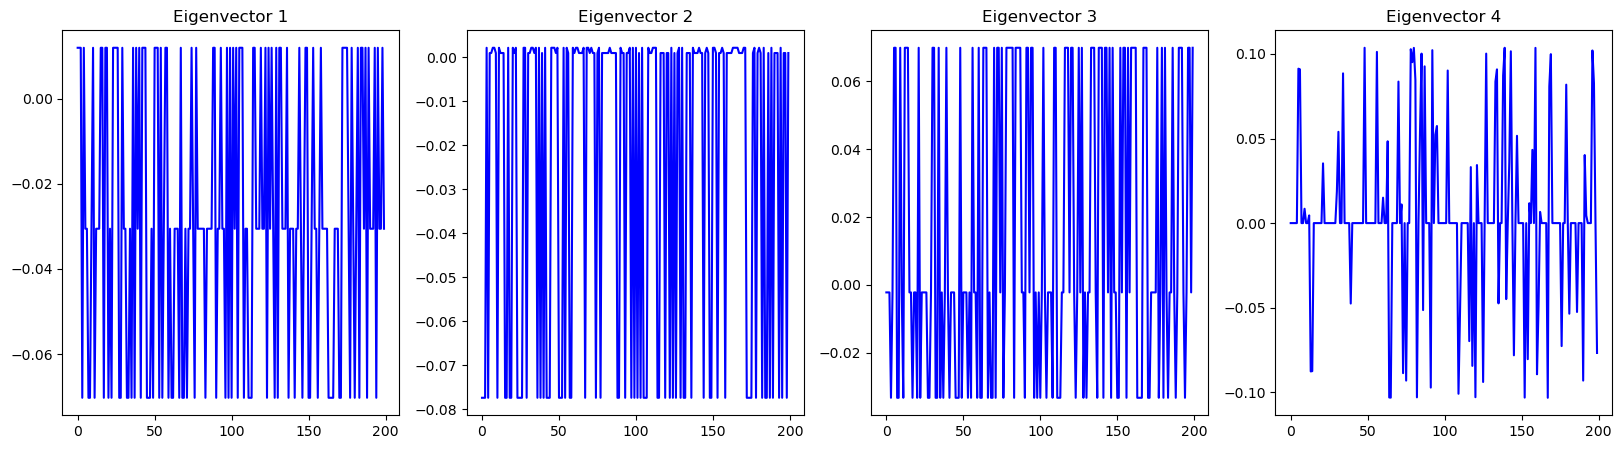

In [169]:
plot_eigen_vectors(evectors,num_elems=200,k=4)

In [170]:

# Define the centers and create Gaussian data
centers = [[1.], [6], [11.]]
gaus_data, gaus_true_labels = make_blobs(n_samples=500, n_features=1, centers=centers, cluster_std=0.4, random_state=seed)

# Create and fit the SpectralClustering model
gaus_spec_cluster = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10, assign_labels="kmeans")
gaus_spec_labels = gaus_spec_cluster.fit_predict(gaus_data)

# Calculate Silhouette score, Adjusted Rand Index, and Adjusted Mutual Information
silhouette_score = metrics.silhouette_score(gaus_data, gaus_spec_labels)
rand_index = metrics.adjusted_rand_score(gaus_true_labels, gaus_spec_labels)
ami = metrics.adjusted_mutual_info_score(gaus_true_labels, gaus_spec_labels, average_method="arithmetic")

print("Silhouette Coefficient:", silhouette_score)
print("Adjusted Rand Index:", rand_index)
print("Adjusted Mutual Information:", ami)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Coefficient: 0.9055659296925189
Adjusted Rand Index: 1.0
Adjusted Mutual Information: 1.0


### Moon data

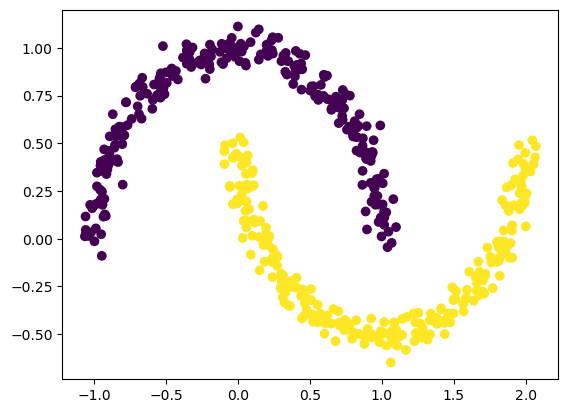

In [171]:
moons_data,moons_true_labels= make_moons(n_samples=500,noise=0.05,random_state=seed)
plt_scatter(moons_data[:,0],moons_data[:,1],moons_true_labels)

In [173]:
moons_spec_cluster=SpectralClustering(n_clusters=2,affinity="nearest_neighbors",n_neighbors=10,assign_labels="kmeans")
moons_spec_cluster.fit(moons_data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


SpectralClustering(affinity='nearest_neighbors', n_clusters=2)

In [174]:
rand_index,mutual_info=get_scores(moons_true_labels,moons_spec_cluster.labels_)
print(f"rand_index: {rand_index:.3f} mutual_info:{mutual_info:3f}")

rand_index: 1.000 mutual_info:1.000000


In [175]:
moons_W=gaus_spec_cluster.affinity_matrix_.A

In [176]:
Lraw=get_normalized_laplacian(moons_W)
evalues, evectors=get_k_lower_eigen(Lraw,k=10)

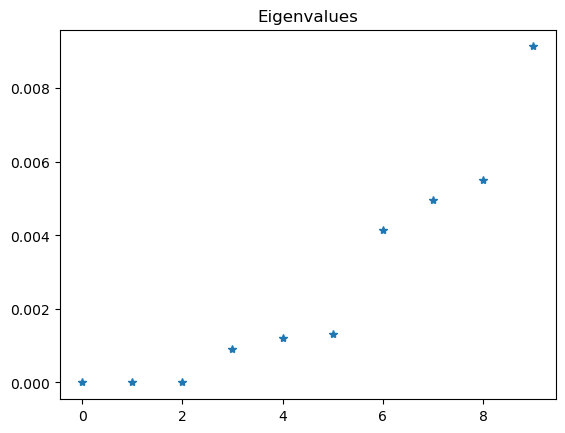

In [177]:
plot_eigen_values(evalues)

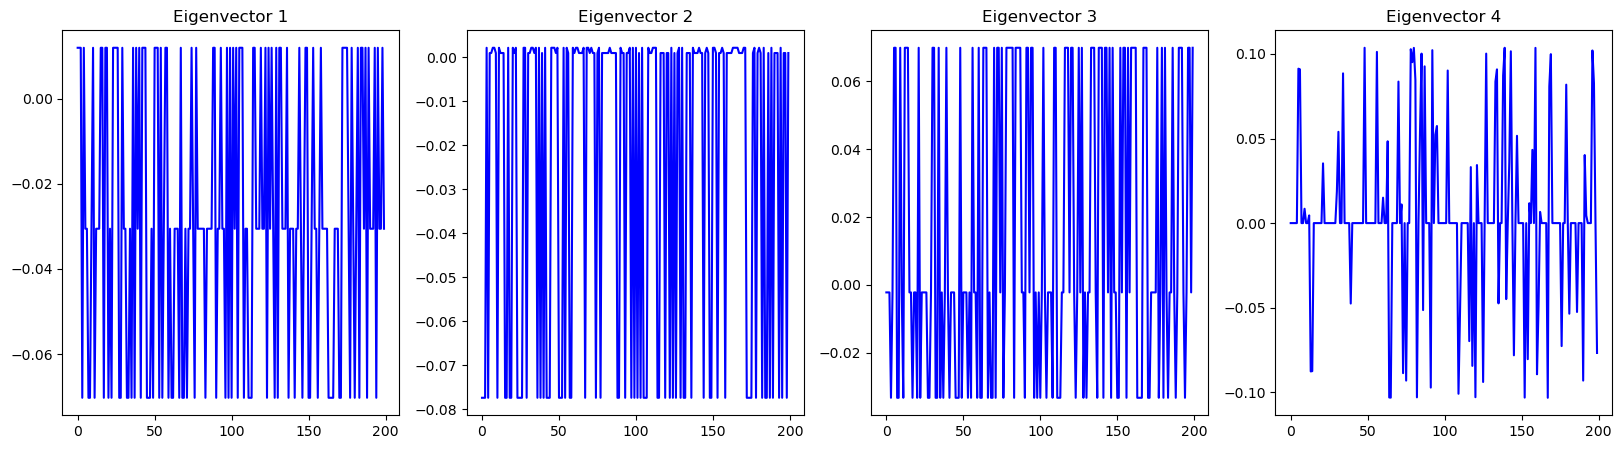

In [178]:
plot_eigen_vectors(evectors,num_elems=200,k=4)

In [181]:
moons_spec_cluster = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', n_neighbors=10, assign_labels="kmeans")
moons_spec_labels = moons_spec_cluster.fit_predict(moons_data)
silhouette_score = metrics.silhouette_score(moons_data, moons_spec_labels)
rand_index = metrics.adjusted_rand_score(moons_true_labels, moons_spec_labels)
ami = metrics.adjusted_mutual_info_score(moons_true_labels, moons_spec_labels, average_method="arithmetic")

print("Silhouette Coefficient:", silhouette_score)
print("Adjusted Rand Index:", rand_index)
print("Adjusted Mutual Information:", ami)


C:\ProgramData\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Coefficient: 0.32124595705853476
Adjusted Rand Index: 0.7564493470485328
Adjusted Mutual Information: 0.8028273012569332


**Ambiguity in Silhouette Score**


The Silhouette score is a metric used to measure the quality of clustering results. It quantifies how similar an object is to its own cluster compared to other clusters. The Silhouette score ranges from -1 to 1, where:

A high positive value (close to 1) indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters, suggesting a good clustering.
A score near 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.
A negative score (close to -1) indicates that the object is probably assigned to the wrong cluster.
The ambiguity in Silhouette scores arises when clusters have different shapes, densities, or sizes. In such cases, the Silhouette score may not accurately reflect the quality of the clustering because it assumes that clusters are roughly spherical and equally sized. If the clusters in your data have irregular shapes, varying densities, or significantly different sizes, the Silhouette score can still be high even when the clustering is not meaningful.

Therefore, it's important to consider the context of your data and the characteristics of your clusters when interpreting Silhouette scores. It may be necessary to use other evaluation metrics or visual inspection of the clusters to assess the quality of the clustering in such cases.